# Forecasting Solar-Energy
### Objective
The primary objective is to build and evaluate a predictive model, with a focus on understanding the relative importance of different features in making predictions. With more solar power integrated into power systems, accurately forecast the power outputs from solar power becomes crucial for reliable and economic operation of the system. The conventional generators need to follow up and ramp down based on the power increase and decline of solar power during sunrise and sunset. During cloudy days, it is also important to forecast the power fluctuations of solar power to prepare adequate reserve capacities. The model deals with structured data needed for solar power forecasting and aims to optimize prediction accuracy while providing explainability with a simple example.  
We use historical time-series data from a specified region in Mississippi from 2006 to analyze and forecast solar-energy output.

### Purpose
- To develop a machine learning pipeline for solar power forecasting purpuse.
- To analyze feature importance for forecasting results interpretability.
- To improve predictive accuracy using feature engineering and optimization techniques.

### Who is this useful for?
- Data Scientists: Interested in understanding feature importance in forecasting models.
- Decision-Makers: Seeking insights from the predictions for actionable strategies.
- Students & Researchers: Exploring predictive modeling and feature analysis.

### Applications
- Predicting outcomes in structured data (e.g., sales, risk assessment, customer behavior).
- Identifying key drivers influencing outcomes for resource allocation.
- Benchmarking model performance against baseline algorithms.

### Notebook Components
1. Data Preparation: Importing, cleaning, and preprocessing data for modeling.
2. Model Development: Training machine learning models.
   - ARIMA model
   - Prophet model
   - LightGBM model
3. Feature Importance Analysis: Evaluating which features contribute the most to predictions.
3. Visualization: Graphically representing feature importance for interpretability.

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install scikit-learn
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
pd.set_option('display.max_rows', 300)

In [3]:

# # file path
# df = pd.read_csv("ms-pv-2006/Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv")
import os
import pandas as pd

current_dir = os.getcwd()
csv_path = os.path.join(current_dir, "ms-pv-2006", "Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv")

df = pd.read_csv(csv_path)
data = pd.read_csv(csv_path)

Add a new column "DateTime", with the following format specified and make it our index for later use

In [4]:
df['Datetime'] = pd.to_datetime(df['LocalTime'], format='%m/%d/%y %H:%M')
df.set_index('Datetime', inplace=True)


In [5]:
df

,LocalTime,Power(MW)
Datetime,,
2006-01-01 00:00:00,01/01/06 00:00,0.0
2006-01-01 00:05:00,01/01/06 00:05,0.0
2006-01-01 00:10:00,01/01/06 00:10,0.0
2006-01-01 00:15:00,01/01/06 00:15,0.0
2006-01-01 00:20:00,01/01/06 00:20,0.0
...,...,...
2006-12-31 23:35:00,12/31/06 23:35,0.0
2006-12-31 23:40:00,12/31/06 23:40,0.0
2006-12-31 23:45:00,12/31/06 23:45,0.0


In [6]:
dff = df['Power(MW)']
df.head(200)

,LocalTime,Power(MW)
Datetime,,
2006-01-01 00:00:00,01/01/06 00:00,0.0
2006-01-01 00:05:00,01/01/06 00:05,0.0
2006-01-01 00:10:00,01/01/06 00:10,0.0
2006-01-01 00:15:00,01/01/06 00:15,0.0
2006-01-01 00:20:00,01/01/06 00:20,0.0
2006-01-01 00:25:00,01/01/06 00:25,0.0
2006-01-01 00:30:00,01/01/06 00:30,0.0
2006-01-01 00:35:00,01/01/06 00:35,0.0
2006-01-01 00:40:00,01/01/06 00:40,0.0


In [7]:
data['LocalTime'] = pd.to_datetime(data['LocalTime'], format='%m/%d/%y %H:%M')
data = data.rename(columns={'LocalTime': 'ds', 'Power(MW)': 'y'})

In [8]:
if data['y'].isnull().sum() > 0:
    data['y'].fillna(method='ffill', inplace=True)

data_hourly = data.resample('H', on='ds').mean().reset_index()

C:\Users\ginobili\AppData\Local\Temp\ipykernel_4584\3612108113.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_hourly = data.resample('H', on='ds').mean().reset_index()


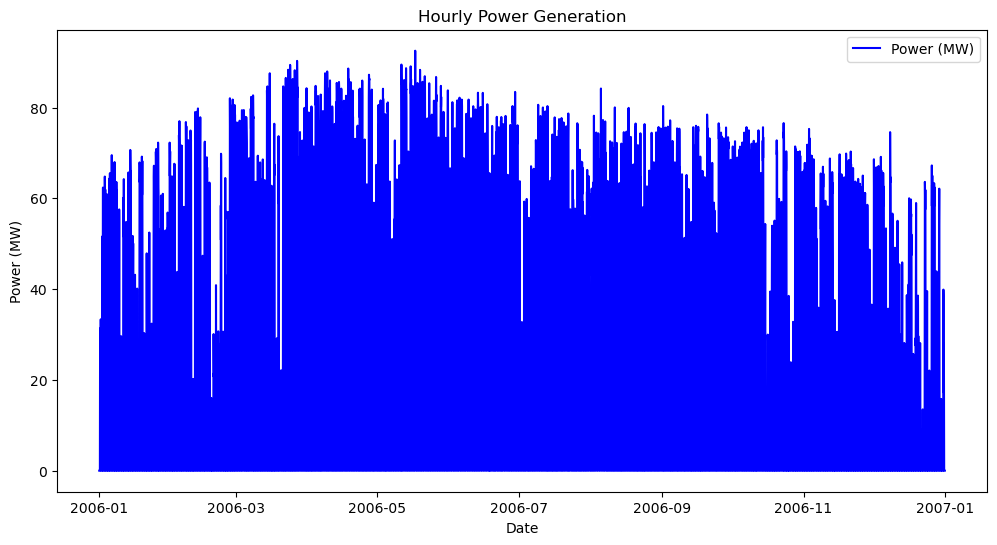

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data_hourly['ds'], data_hourly['y'], color='b', label='Power (MW)')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.title('Hourly Power Generation')
plt.legend()
plt.show()

From the overview, our data seems to have high daily seasonality, with zeros in the nighttime and peak power output during the day.

### Arima
We are not sure what model suits our data the best, so we start by using the typical model used for time-series forecasting, the **Auto-Regressive Integrated Moving Average (ARIMA)** model. 
The ARIMA model is only suitable for stationary data, our data seems to have daily seasonality, so we go into the prediction expecting lower accuracy.

In [10]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")

The **Augmented Dickey-Fuller (ADF)** test is commonly used to check whether a time series is stationary. A stationary series has statistical properties (like mean and variance) that do not change over time.

In [11]:
adf_test(dff)

ADF Statistic: -39.028619911560554
p-value: 0.0
Series is stationary


The ADF test has a loose confidence interval and suggests our data is stationary, which may not necessarily be true, but we move on with it and do not use **differencing**.     **Differencing** is a transformation technique used in time series analysis to make a non-stationary series stationary by removing trends or seasonality. It involves subtracting the previous observation from the current observation.   
Though we might want to try differencing later.

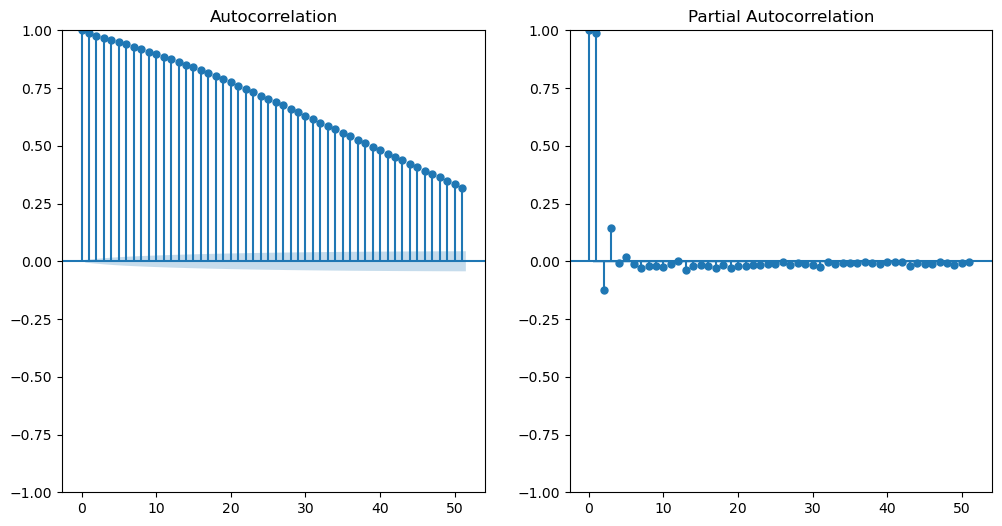

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(dff, ax=plt.gca())
plt.subplot(122)
plot_pacf(dff, ax=plt.gca())
plt.show()

The ARIMA model has p, d and q values that we have to select based on our data. We use these acf and pacf graphs to determine those values.  
From the graphs above we understand that differencing is required for our data.

In [13]:
# Differencing
df['PowerDiff'] = dff.diff().dropna()
diff = df['PowerDiff']

Construct the plot again for our differenced data.

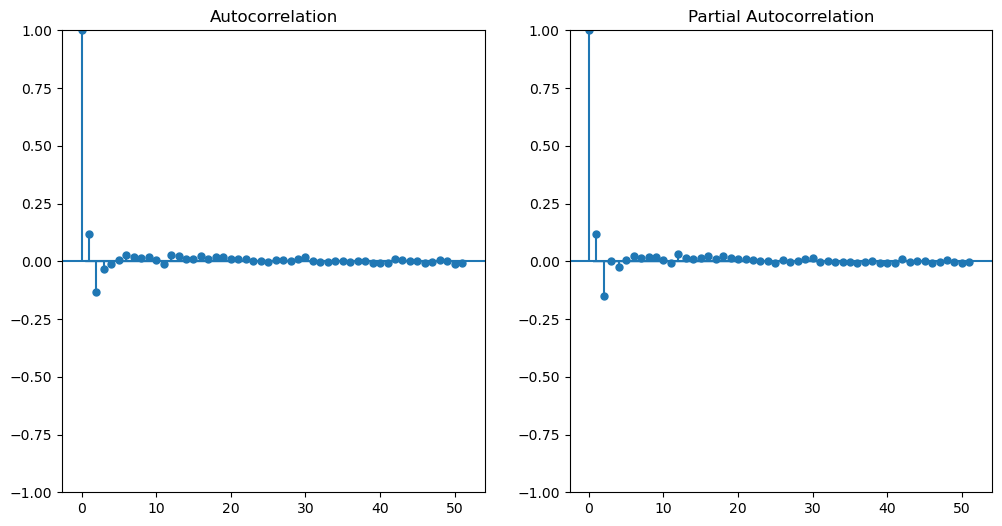

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(diff.dropna(), ax=plt.gca())  # ACF for 'q'
plt.subplot(122)
plot_pacf(diff.dropna(), ax=plt.gca())  # PACF for 'p'
plt.show()

We can finally see from the graps what values for p, d, and q we need to take for our model. p = 2, d = 0 and q = 2.  
We can also check if our assumptions are correct using the grid-search algorithm to calculate the best order for our model.

In [15]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

def evaluate_arima_model(X, arima_order):
    model = ARIMA(X, order=arima_order)
    model_fit = model.fit()
    return model_fit.aic


def grid_search_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    aic = evaluate_arima_model(data, (p,d,q))
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                except:
                    continue
    return best_order


p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)


best_order = grid_search_arima(dff, p_values, d_values, q_values)
print(f'Best ARIMA order: {best_order}')

Best ARIMA order: (2, 0, 2)


In [16]:
# Splitting the data into test and train.
train_size = int(len(df) * 0.8)
train, test = dff[:train_size], dff[train_size:]

In [17]:
# Fitting the model
best_p, best_d, best_q = best_order
model = ARIMA(train, order=(best_p, best_d, best_q))
model_fit = model.fit()


predictions = model_fit.forecast(steps=len(test))


mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 25.928171046845744


Output the values at different times of day to check our prediction

In [18]:
print(predictions[:21024:100])
print(f"Test set length: {len(test)}, Predictions length: {len(predictions)}")

2006-10-20 00:00:00     0.242440
2006-10-20 08:20:00    15.077833
2006-10-20 16:40:00    20.586042
2006-10-21 01:00:00    22.638098
2006-10-21 09:20:00    23.402582
2006-10-21 17:40:00    23.687386
2006-10-22 02:00:00    23.793489
2006-10-22 10:20:00    23.833017
2006-10-22 18:40:00    23.847743
2006-10-23 03:00:00    23.853229
2006-10-23 11:20:00    23.855272
2006-10-23 19:40:00    23.856034
2006-10-24 04:00:00    23.856318
2006-10-24 12:20:00    23.856423
2006-10-24 20:40:00    23.856463
2006-10-25 05:00:00    23.856477
2006-10-25 13:20:00    23.856483
2006-10-25 21:40:00    23.856485
2006-10-26 06:00:00    23.856486
2006-10-26 14:20:00    23.856486
2006-10-26 22:40:00    23.856486
2006-10-27 07:00:00    23.856486
2006-10-27 15:20:00    23.856486
2006-10-27 23:40:00    23.856486
2006-10-28 08:00:00    23.856486
2006-10-28 16:20:00    23.856486
2006-10-29 00:40:00    23.856486
2006-10-29 09:00:00    23.856486
2006-10-29 17:20:00    23.856486
2006-10-30 01:40:00    23.856486
2006-10-30

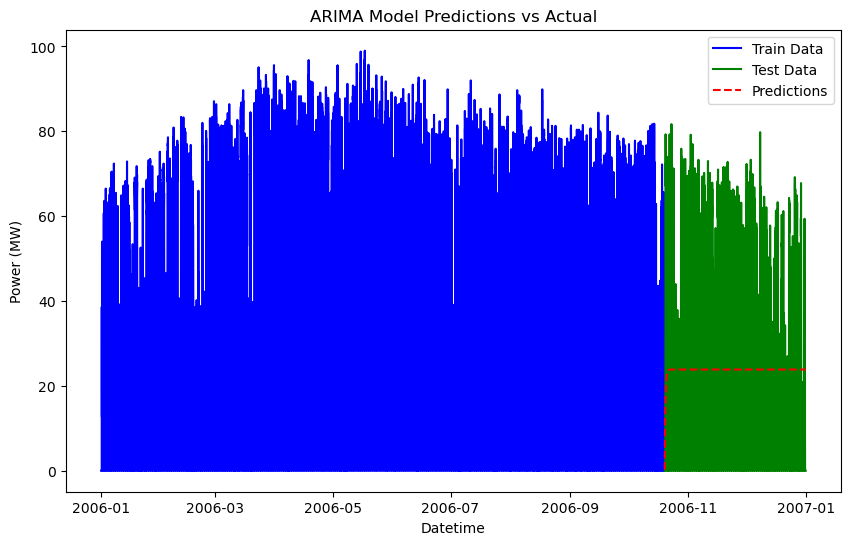

In [19]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
plt.legend()
plt.xlabel('Datetime')
plt.ylabel('Power (MW)')
plt.title('ARIMA Model Predictions vs Actual')
plt.show()

We can see from our data and the plot, our prediction sharply increases and peaks at around 23, both for the daytime and the night time, which has a very poor accuracy.

In [20]:
# Forecast next 100 values
future_steps = 100
forecast = model_fit.forecast(steps=future_steps)

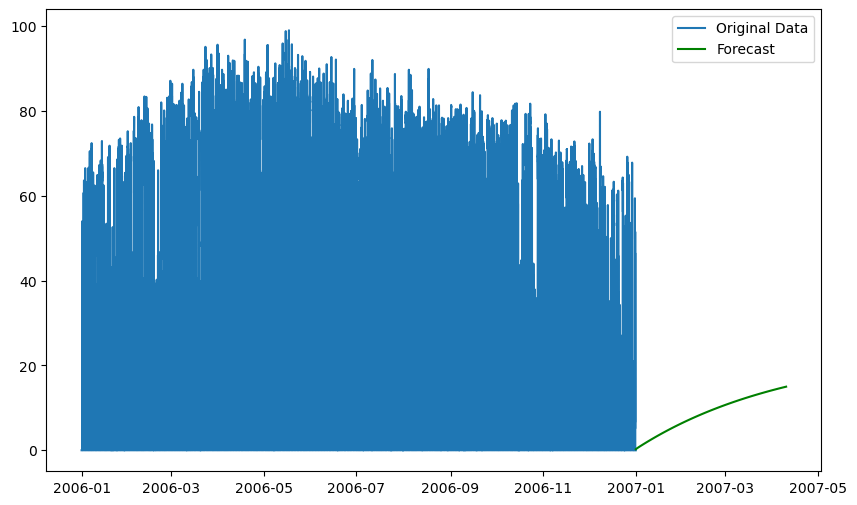

In [21]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(df.index, dff, label='Original Data')  # Replace 'Value' with correct column name
plt.plot(pd.date_range(df.index[-1], periods=future_steps, freq='D'), forecast, label='Forecast', color='green')
plt.legend()
plt.show()

ARIMA yeilded a poor prediction potentially due to our data being highly seasonal. So we try to use a model that is known for handing seasonal data effectively.

## Prophet
The Prophet model, developed by Meta, is a robust and user-friendly tool for time series forecasting. It is particularly well-suited for data with strong seasonal patterns and missing values, as well as scenarios where the data may have outliers or trend changes. Below is an overview of the Prophet model and its components.

In [22]:
import sys
!{sys.executable} -m pip install prophet
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [23]:
import os
current_dir = os.getcwd()
csv_path = os.path.join(current_dir, "ms-pv-2006", "Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv")
data = pd.read_csv(csv_path)

In [24]:
data['LocalTime'] = pd.to_datetime(data['LocalTime'], format='%m/%d/%y %H:%M')
data = data.rename(columns={'LocalTime': 'ds', 'Power(MW)': 'y'})

In [25]:
if data['y'].isnull().sum() > 0:
    data['y'].fillna(method='ffill', inplace=True)

data_hourly = data.resample('H', on='ds').mean().reset_index()

In [26]:
split_index = int(len(data_hourly) * 0.8)
train_data = data_hourly[:split_index]
test_data = data_hourly[split_index:]

In [27]:
# Fit the model
model = Prophet(yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True)
model.fit(train_data)

16:18:01 - cmdstanpy - INFO - Chain [1] start processing
16:18:02 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
# Make future predictions
future = model.make_future_dataframe(periods=24*30, freq='H')
forecast = model.predict(future)

In [29]:
test_forecast = forecast.merge(test_data, on='ds', how='right')

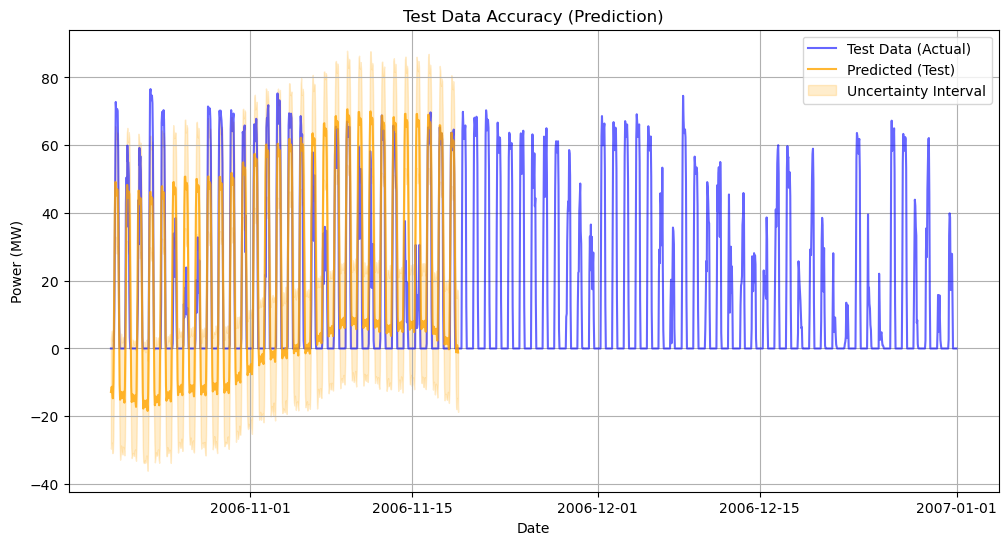

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], test_data['y'], label='Test Data (Actual)', color='blue', alpha=0.6)
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Predicted (Test)', color='orange', alpha=0.8)
plt.fill_between(test_forecast['ds'], test_forecast['yhat_lower'], test_forecast['yhat_upper'], color='orange', alpha=0.2, label='Uncertainty Interval')
plt.title("Test Data Accuracy (Prediction)")
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.legend()
plt.grid()
plt.show()

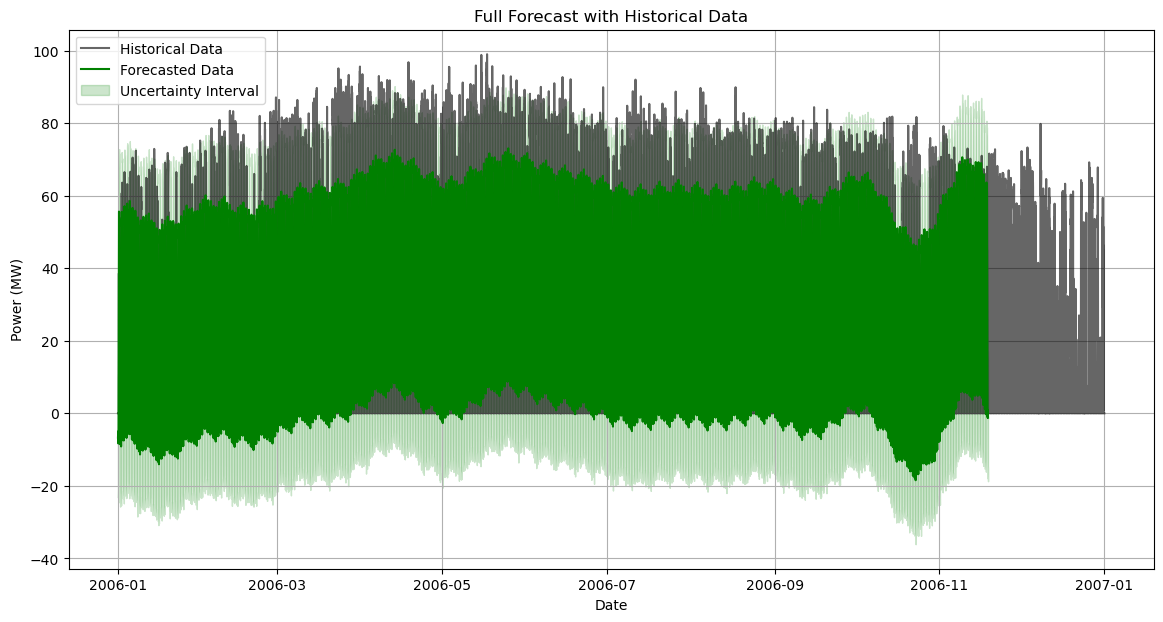

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(data['ds'], data['y'], label='Historical Data', color='black', alpha=0.6)
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')
plt.title("Full Forecast with Historical Data")
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.legend()
plt.grid()
plt.show()

In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][:7000:70]

,ds,yhat,yhat_lower,yhat_upper
0,2006-01-01 00:00:00,-6.659200,-23.211488,9.840274
70,2006-01-03 22:00:00,-4.470735,-20.402920,12.044485
140,2006-01-06 20:00:00,-6.591236,-23.882984,9.515360
210,2006-01-09 18:00:00,-5.583960,-22.919847,10.967810
280,2006-01-12 16:00:00,26.847897,10.803766,43.196127
350,2006-01-15 14:00:00,48.078047,31.764809,63.690271
420,2006-01-18 12:00:00,49.431705,33.782478,65.941047
490,2006-01-21 10:00:00,53.029169,36.989606,70.851935
560,2006-01-24 08:00:00,45.396343,28.422591,60.733378
630,2006-01-27 06:00:00,10.706000,-5.344378,26.988987


#### Accuracy

We can see that we have increased our accuracy greatly, using this model accounting for all the seasonality, but still it is predicting values to be less than 0 as well, which can never happen in our model.

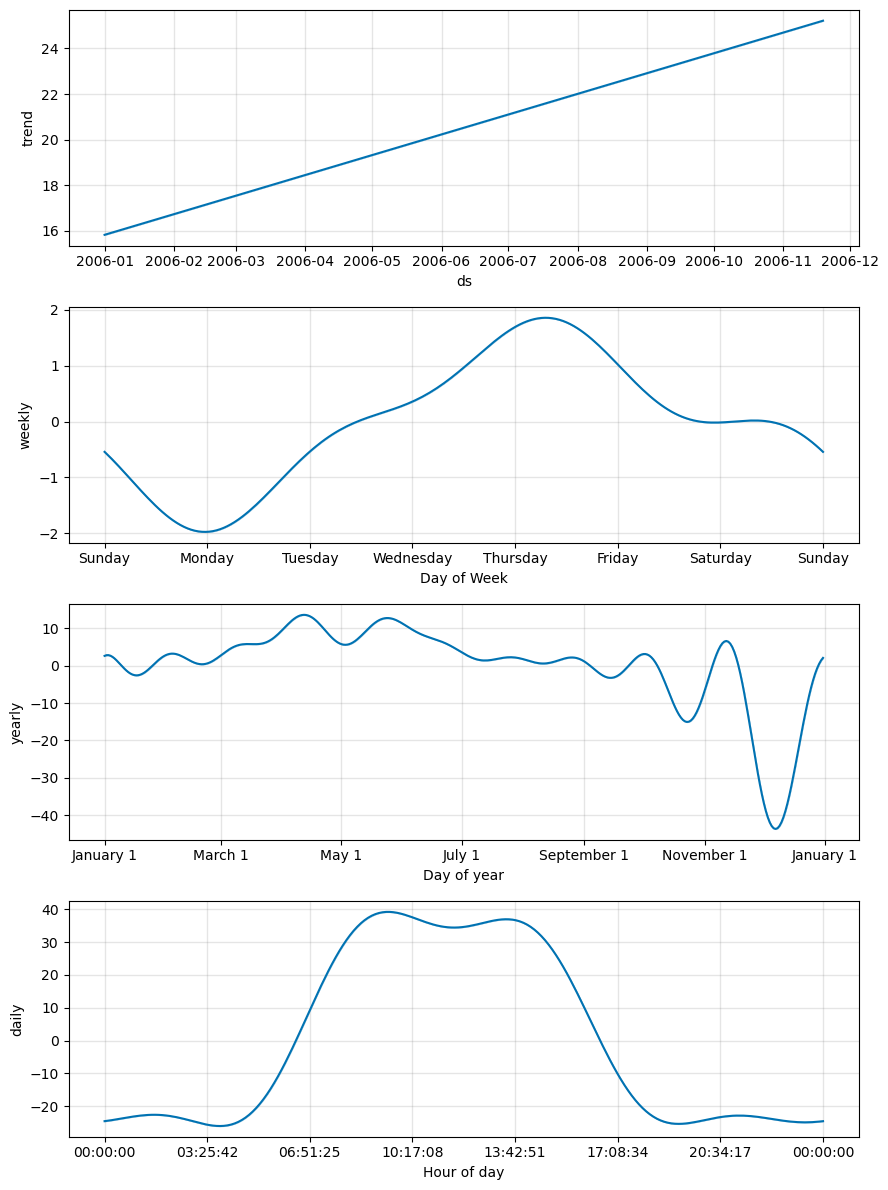

In [33]:
model.plot_components(forecast)
plt.show()

These plots reveal the seasonality patterns in our forecasted data, highlighting the underlying trends of the data.  
Until now we have not taken account of the seasonality of the data before forecasting and have let the model take care of it by itself. We now try to take care of the seasonality of the data by ourselves.

## LightGBM with feature engineering
**LightGBM (Light Gradient Boosting Machine)** is a powerful and efficient gradient boosting framework widely used for machine learning tasks.

**Feature engineering** is the process of preparing and transforming raw data into features that better represent the underlying problem to improve the performance of a machine learning model. A feature is an individual measurable property or characteristic of a phenomenon being observed, often represented as a column in a dataset.  
The goal of feature engineering is to extract the most relevant information from the raw data, making it easier for the model to learn patterns and make predictions.

In [34]:
import sys
!{sys.executable} -m pip install lightgbm
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
import os
current_dir = os.getcwd()
csv_path = os.path.join(current_dir, "ms-pv-2006", "Actual_30.25_-89.45_2006_UPV_118MW_5_Min.csv")
data = pd.read_csv(csv_path)
data['LocalTime'] = pd.to_datetime(data['LocalTime'], format='%m/%d/%y %H:%M')


In [36]:
# Feature Engineering
data['hour'] = data['LocalTime'].dt.hour
data['day_of_week'] = data['LocalTime'].dt.dayofweek
data['month'] = data['LocalTime'].dt.month
data['is_daytime'] = ((data['hour'] >= 6) & (data['hour'] <= 18)).astype(int)

Add the features: hour, day of the week, month and is_daytime as columns to the data.

In [37]:
# Define features and target variable
X = data[['hour', 'day_of_week', 'month', 'is_daytime']]
y = data['Power(MW)']

In [38]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [39]:
# LightGBM Model Training
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [40]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [41]:
# Train the model with early stopping
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_eval],  # Validation set
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),  # Early stopping callback
        lgb.log_evaluation(period=100)          # Log evaluation progress every 100 iterations
    ]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 84096, number of used features: 4
[LightGBM] [Info] Start training from score 23.859394
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's rmse: 15.1899


In [42]:
# Predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [43]:
# Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 15.189919633723044
Mean Absolute Error (MAE): 10.479850535578153


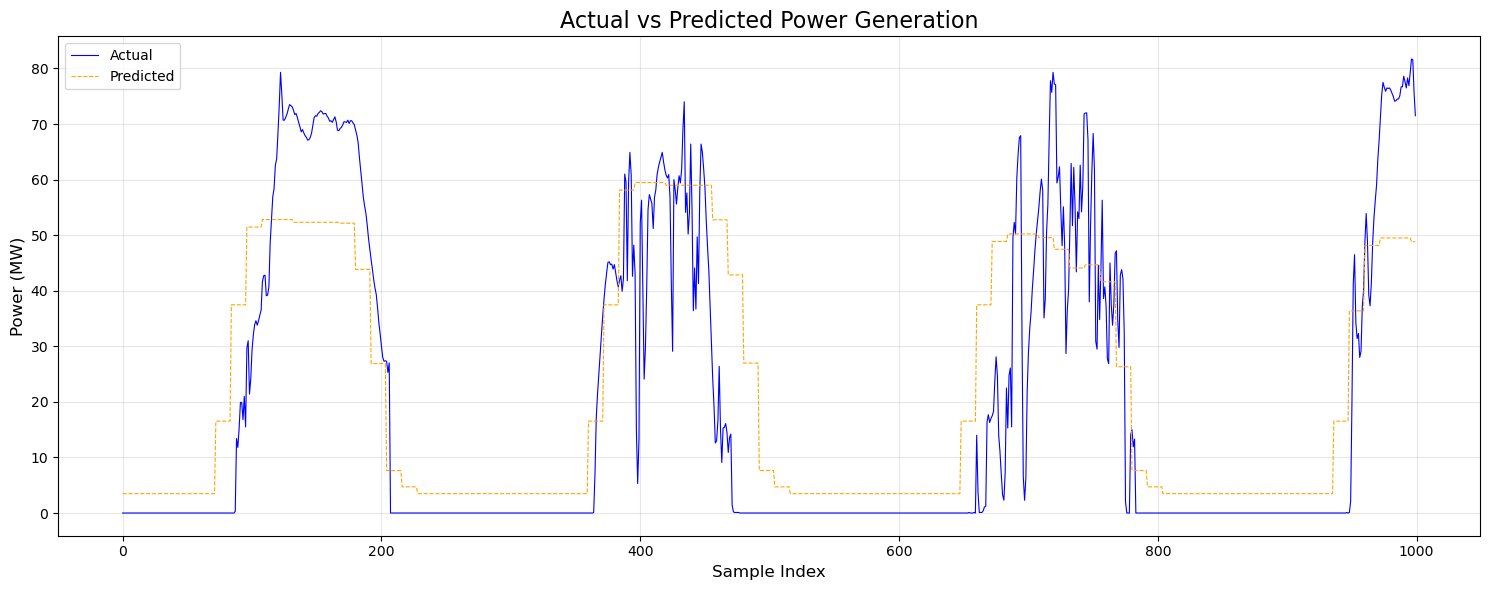

In [44]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:1000], label="Actual", color='blue', linewidth=0.8)
plt.plot(y_pred[:1000], label="Predicted", color='orange', linestyle='--', linewidth=0.8)
plt.title('Actual vs Predicted Power Generation', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Power (MW)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This yeilded a much better result than all the other models, with a low RMSE and MAE for a time series data with high seasonality. 

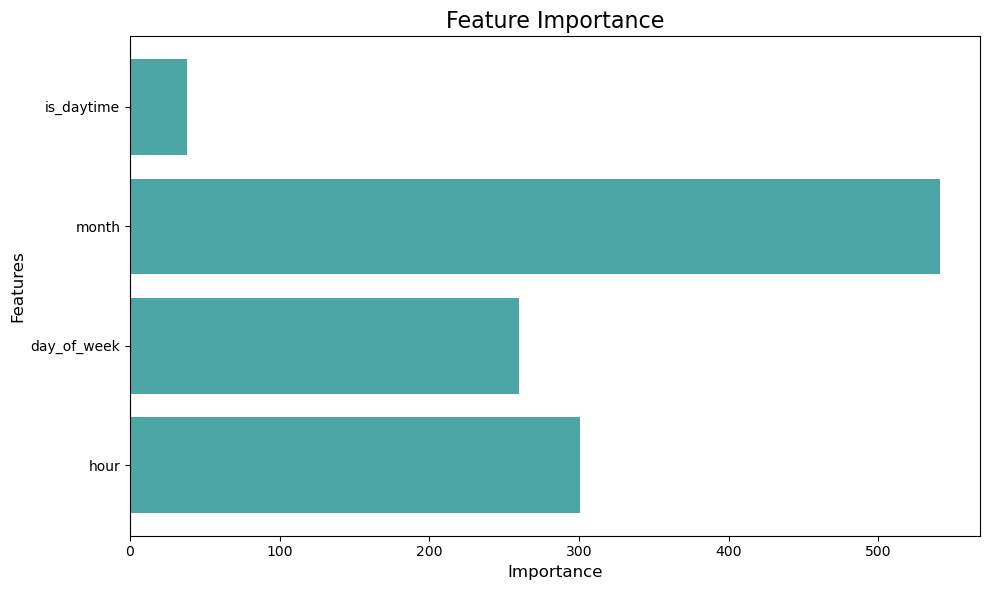

In [45]:
# Feature Importance
importance = model.feature_importance()
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='teal', alpha=0.7)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

The lower the value, the greater the importance, so as expected is_daytime which is a boolean that is true if the time of day is between 6 am and 6 pm and false rest of the time turned out to be the most important factor in a successful prediction.

## Key findings
- Due to a highly seasonal data, we can see how the accuracy improves when using models more suitable for such data, with gradient boosting integrated with featuring engineering yielding the best results.
- The most significant feature is is_daytime, a boolean indicating whether the observation falls between 6 AM and 6 PM, underscoring its importance in prediction success.
- Graphical representation clearly illustrates the ranking of feature importance.